In [1]:
# import các thư viện
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set_style("whitegrid")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# đọc dữ liệu từ file data.txt
data = np.loadtxt("/content/drive/MyDrive/data.txt", delimiter=',')
x, y = data[:, :2], data[:, 2]

In [9]:
# xem trước 5 dữ liệu đầu tiên
print(x[:5])
print(y[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
[399900. 329900. 369000. 232000. 539900.]


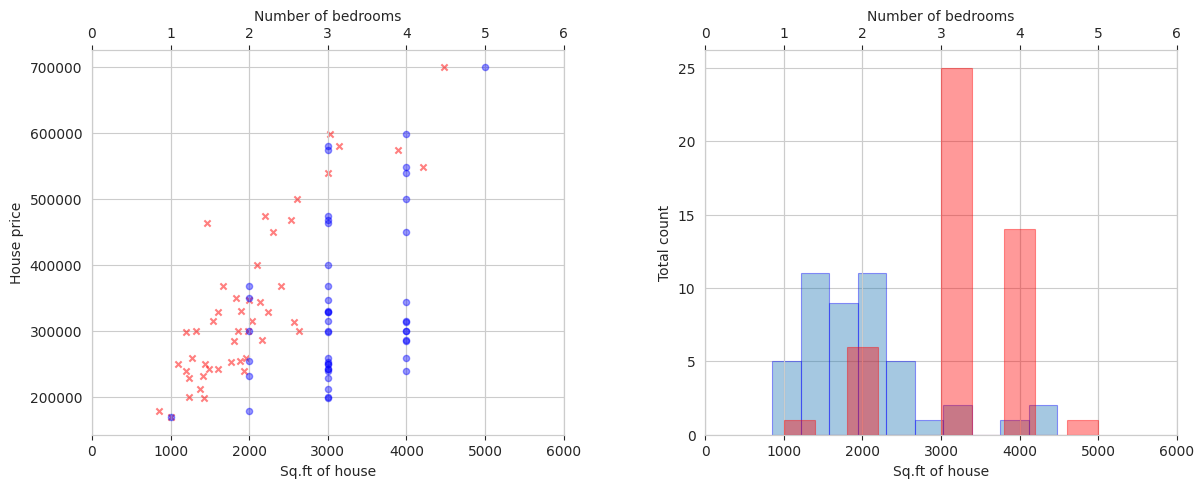

In [10]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20)
ax1.set_xlabel('Sq.ft of house')
ax1.set_ylabel('House price')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20)
ax3.set_xlabel('Number of bedrooms')
ax3.set_xlim(0, 6)

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8)
ax2.set_xlabel('Sq.ft of house')
ax2.set_ylabel('Total count')
ax2.set_xlim(0, 6000)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8)
ax4.set_xlabel('Number of bedrooms')
ax4.set_xlim(0, 6);

plt.show()


Bài 1

In [16]:
def featureNormalize(X):
    """
    mu: giá trị mean
    sigma: phương sai (standard deviation)
    X_norm: giá trị sau chuẩn hoá
    """
    ### START CODE HERE ### (≈ 3 line of code)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
     ### END CODE HERE ###
    return X_norm, mu, sigma

In [12]:
# In dữ liệu trước khi chuẩn hoá
print(x[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]


In [13]:
# Chuẩn hoá dữ liệu
X, mean, sigma = featureNormalize(x)

In [14]:
# Dữ liệu sau khi chuẩn hoá
print(X[:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


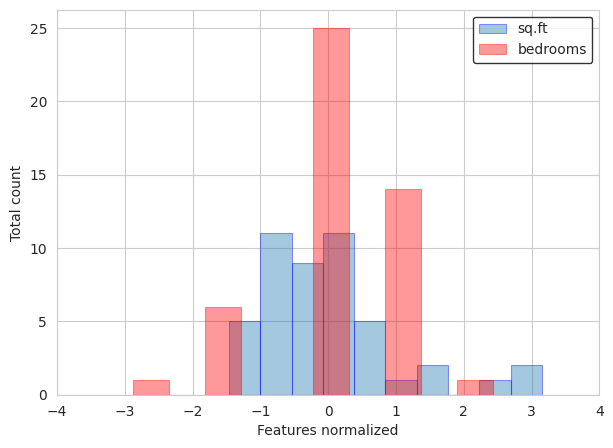

In [15]:
fig = plt.figure(figsize=(7, 5))

# Histograms:
plt.hist(X[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='sq.ft')
plt.hist(X[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

plt.show()

Bài 2

In [17]:
"""
Gợi ý sử dụng: np.ones và np.hstack
"""

### START CODE HERE ### (≈ 1 line of code)
X = np.hstack([np.ones((X.shape[0], 1)), X])
### END CODE HERE ###

In [18]:
print(X[:5])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


In [21]:
theta = np.zeros(3)
iterations = 1500
alpha = 0.01

bài 3

In [37]:
def computeCost(X, y, theta):
    m = len(y)

    ### START CODE HERE ### (≈ 1 line of code)
    cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    ### END CODE HERE ###

    return cost

In [ ]:
computeCost(X, y, theta)

Bài 4

In [26]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)

    for i in range(iterations):
        ### START CODE HERE ### (≈ 1 line of code)
        thetaMod = thetaMod - (alpha/m) * X.T.dot(X.dot(thetaMod) - y)
        ### END CODE HERE ###
        thetaHist[i] = thetaMod[1]
        cost[i] = computeCost(X, y, thetaMod)

    return thetaMod, thetaHist, cost

In [ ]:
gradient, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)
print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(gradient[0], gradient[1], gradient[2]))

In [ ]:
plt.plot(cost)
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)

model = reg.fit(x, y)

print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(model.intercept_, model.coef_[0], model.coef_[1]))

theta[0]: 89597.90954279754
theta[1]: 139.2106740176255
theta[2]: -8738.019112327831


In [ ]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))

for alpha in learningRates:
    gradientNew, thetaHistNew, costNew = gradientDescent(X, y, theta, alpha, 50)
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');
plt.show()

5. Thực hiện dự đoán

In [47]:
# Chạy lại thuật toán với LR tối ưu = 0.03
gradient, thetaHist, cost = gradientDescent(X, y, theta, 0.03, 500)

# normalizing parameters:
paramsNorm = (np.array([1650, 3]) - mean) / sigma

# thêm cột 1 vào paramsNorm
params = np.hstack((np.array([1]), paramsNorm))

# Dự đoán giá nhà
predict = np.dot(gradient, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $nan


<ipython-input-37-bd95fa91442a>:5: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
<ipython-input-26-73f76a47b3e5>:9: RuntimeWarning: invalid value encountered in subtract
  thetaMod = thetaMod - (alpha/m) * X.T.dot(X.dot(thetaMod) - y)


6. Nghiệm bằng Normal Equation (Theo phương pháp thông thường)

In [43]:
from numpy.linalg import inv

"""
Gợi ý sử dụng inv để tính ma trận nghịch đảo.
"""

# Định nghĩa hàm normal equation
def normalEqn(X, y):
    ### START CODE HERE ### (≈ 1 line of code)
    theta = inv(X.T.dot(X)).dot(X.T).dot(y)
    ### END CODE HERE ###

    return theta

In [44]:
# Với Normal Equation ta cũng cần thêm vector cột 1 vào ma trận x
X = np.ones((len(x), 3))
X[:, 1:] = x

thetaN = normalEqn(X, y)

In [45]:
thetaN = normalEqn(X, y)
print('theta[0]: {}\ntheta[1]: {}\ntheta[2]: {}'.format(thetaN[0], thetaN[1], thetaN[2]))

theta[0]: 89597.90954279699
theta[1]: 139.21067401762542
theta[2]: -8738.019112327687


In [46]:
# Dự đoán với căn nhà 1650 feet, 3 phòng ngủ
params = np.array([1, 1650, 3])

predict = np.dot(thetaN, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $293081.46
